In [57]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files
uploaded=files.upload()

Saving poems.csv to poems (1).csv


In [58]:
df = pd.read_csv('poems.csv', encoding='ISO-8859-1', on_bad_lines='skip')
df

,poem_name,poem_content,poet_name,category
0,I Wandered Lonely As A Cloud (Daffodils),I wandered lonely as a cloud|That floats on hi...,Wordsworth William,lonely
1,Lonely Am I,Lonely are the nights|Lonely are the days|Lone...,foulk jim,lonely
2,A Thought For A Lonely Death,IF God compel thee to this destiny||To die alo...,Browning Barrett,lonely
3,Lonely Is Just One Word,Lonely is just one word chosen to represent so...,Havran Mary,lonely
4,The Lonely Soul,The lonely soul wanders|Alone in the walks of ...,thermadam anto,lonely
...,...,...,...,...
389,I Believe I Am N I Believe I Can,I believe i am wise enuff 2 amke my own choice...,Kelly Shakima,believe
390,Why Dont You Believe Me When I Say Youre Ama...,Why dont you believe me when I say youre ama...,Brown Dan,believe
391,Believe In Yourself,When you look for recognition|do you seek appr...,Moore Ann,believe
392,I Believe In,I believe in having good friends|They keep you...,Chidi Sylvia,believe


In [77]:
df.columns

Index(['poem_name', ' poem_content ', 'poet_name ', 'category', 'poem_content',
       'poem_content_cleaned', 'poem_tokens', 'poem_stemmed',
       'poem_content_final', 'mapped_emotions', 'sentiment',
       'sentiment_score'],
      dtype='object')

In [59]:
df['poem_content'] = df[' poem_content '].str.replace('|', ' ', regex=False)
df.drop(columns=[' poem_content '])

,poem_name,poet_name,category,poem_content
0,I Wandered Lonely As A Cloud (Daffodils),Wordsworth William,lonely,I wandered lonely as a cloud That floats on hi...
1,Lonely Am I,foulk jim,lonely,Lonely are the nights Lonely are the days Lone...
2,A Thought For A Lonely Death,Browning Barrett,lonely,IF God compel thee to this destiny To die alo...
3,Lonely Is Just One Word,Havran Mary,lonely,Lonely is just one word chosen to represent so...
4,The Lonely Soul,thermadam anto,lonely,The lonely soul wanders Alone in the walks of ...
...,...,...,...,...
389,I Believe I Am N I Believe I Can,Kelly Shakima,believe,I believe i am wise enuff 2 amke my own choice...
390,Why Dont You Believe Me When I Say Youre Ama...,Brown Dan,believe,Why dont you believe me when I say youre ama...
391,Believe In Yourself,Moore Ann,believe,When you look for recognition do you seek appr...
392,I Believe In,Chidi Sylvia,believe,I believe in having good friends They keep you...


In [60]:
!pip install nltk

In [61]:
df['poem_content_cleaned'] = df['poem_content'].str.lower()
import re
df['poem_content_cleaned'] = df['poem_content_cleaned'].str.replace(r'[^\w\s]', '', regex=True) #matching any characters which is not letter, digit, whitespace or underscore

In [62]:
#removing stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['poem_content_cleaned'] = df['poem_content_cleaned'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,poem_name,poem_content,poet_name,category,poem_content,poem_content_cleaned
0,I Wandered Lonely As A Cloud (Daffodils),I wandered lonely as a cloud|That floats on hi...,Wordsworth William,lonely,I wandered lonely as a cloud That floats on hi...,wandered lonely cloud floats high oer vales hi...
1,Lonely Am I,Lonely are the nights|Lonely are the days|Lone...,foulk jim,lonely,Lonely are the nights Lonely are the days Lone...,lonely nights lonely days lonely many ways lon...
2,A Thought For A Lonely Death,IF God compel thee to this destiny||To die alo...,Browning Barrett,lonely,IF God compel thee to this destiny To die alo...,god compel thee destiny die alone none beside ...
3,Lonely Is Just One Word,Lonely is just one word chosen to represent so...,Havran Mary,lonely,Lonely is just one word chosen to represent so...,lonely one word chosen represent much tell fee...
4,The Lonely Soul,The lonely soul wanders|Alone in the walks of ...,thermadam anto,lonely,The lonely soul wanders Alone in the walks of ...,lonely soul wanders alone walks life soul comp...
...,...,...,...,...,...,...
389,I Believe I Am N I Believe I Can,I believe i am wise enuff 2 amke my own choice...,Kelly Shakima,believe,I believe i am wise enuff 2 amke my own choice...,believe wise enuff 2 amke choices believe spea...
390,Why Dont You Believe Me When I Say Youre Ama...,Why dont you believe me when I say youre ama...,Brown Dan,believe,Why dont you believe me when I say youre ama...,dont believe say youre amazing say handsome fa...
391,Believe In Yourself,When you look for recognition|do you seek appr...,Moore Ann,believe,When you look for recognition do you seek appr...,look recognition seek approval praise keeps go...
392,I Believe In,I believe in having good friends|They keep you...,Chidi Sylvia,believe,I believe in having good friends They keep you...,believe good friends keep date latest fashion ...


In [63]:
import nltk#tokenization
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
df['poem_tokens'] = df['poem_content_cleaned'].apply(word_tokenize)
df

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,poem_name,poem_content,poet_name,category,poem_content,poem_content_cleaned,poem_tokens
0,I Wandered Lonely As A Cloud (Daffodils),I wandered lonely as a cloud|That floats on hi...,Wordsworth William,lonely,I wandered lonely as a cloud That floats on hi...,wandered lonely cloud floats high oer vales hi...,"[wandered, lonely, cloud, floats, high, oer, v..."
1,Lonely Am I,Lonely are the nights|Lonely are the days|Lone...,foulk jim,lonely,Lonely are the nights Lonely are the days Lone...,lonely nights lonely days lonely many ways lon...,"[lonely, nights, lonely, days, lonely, many, w..."
2,A Thought For A Lonely Death,IF God compel thee to this destiny||To die alo...,Browning Barrett,lonely,IF God compel thee to this destiny To die alo...,god compel thee destiny die alone none beside ...,"[god, compel, thee, destiny, die, alone, none,..."
3,Lonely Is Just One Word,Lonely is just one word chosen to represent so...,Havran Mary,lonely,Lonely is just one word chosen to represent so...,lonely one word chosen represent much tell fee...,"[lonely, one, word, chosen, represent, much, t..."
4,The Lonely Soul,The lonely soul wanders|Alone in the walks of ...,thermadam anto,lonely,The lonely soul wanders Alone in the walks of ...,lonely soul wanders alone walks life soul comp...,"[lonely, soul, wanders, alone, walks, life, so..."
...,...,...,...,...,...,...,...
389,I Believe I Am N I Believe I Can,I believe i am wise enuff 2 amke my own choice...,Kelly Shakima,believe,I believe i am wise enuff 2 amke my own choice...,believe wise enuff 2 amke choices believe spea...,"[believe, wise, enuff, 2, amke, choices, belie..."
390,Why Dont You Believe Me When I Say Youre Ama...,Why dont you believe me when I say youre ama...,Brown Dan,believe,Why dont you believe me when I say youre ama...,dont believe say youre amazing say handsome fa...,"[dont, believe, say, youre, amazing, say, hand..."
391,Believe In Yourself,When you look for recognition|do you seek appr...,Moore Ann,believe,When you look for recognition do you seek appr...,look recognition seek approval praise keeps go...,"[look, recognition, seek, approval, praise, ke..."
392,I Believe In,I believe in having good friends|They keep you...,Chidi Sylvia,believe,I believe in having good friends They keep you...,believe good friends keep date latest fashion ...,"[believe, good, friends, keep, date, latest, f..."


In [64]:
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
df['poem_stemmed'] = df['poem_tokens'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])
df

,poem_name,poem_content,poet_name,category,poem_content,poem_content_cleaned,poem_tokens,poem_stemmed
0,I Wandered Lonely As A Cloud (Daffodils),I wandered lonely as a cloud|That floats on hi...,Wordsworth William,lonely,I wandered lonely as a cloud That floats on hi...,wandered lonely cloud floats high oer vales hi...,"[wandered, lonely, cloud, floats, high, oer, v...","[wander, lone, cloud, float, high, oer, vale, ..."
1,Lonely Am I,Lonely are the nights|Lonely are the days|Lone...,foulk jim,lonely,Lonely are the nights Lonely are the days Lone...,lonely nights lonely days lonely many ways lon...,"[lonely, nights, lonely, days, lonely, many, w...","[lone, night, lone, day, lone, mani, way, lone..."
2,A Thought For A Lonely Death,IF God compel thee to this destiny||To die alo...,Browning Barrett,lonely,IF God compel thee to this destiny To die alo...,god compel thee destiny die alone none beside ...,"[god, compel, thee, destiny, die, alone, none,...","[god, compel, thee, destini, die, alon, none, ..."
3,Lonely Is Just One Word,Lonely is just one word chosen to represent so...,Havran Mary,lonely,Lonely is just one word chosen to represent so...,lonely one word chosen represent much tell fee...,"[lonely, one, word, chosen, represent, much, t...","[lone, one, word, chosen, repres, much, tell, ..."
4,The Lonely Soul,The lonely soul wanders|Alone in the walks of ...,thermadam anto,lonely,The lonely soul wanders Alone in the walks of ...,lonely soul wanders alone walks life soul comp...,"[lonely, soul, wanders, alone, walks, life, so...","[lone, soul, wander, alon, walk, life, soul, c..."
...,...,...,...,...,...,...,...,...
389,I Believe I Am N I Believe I Can,I believe i am wise enuff 2 amke my own choice...,Kelly Shakima,believe,I believe i am wise enuff 2 amke my own choice...,believe wise enuff 2 amke choices believe spea...,"[believe, wise, enuff, 2, amke, choices, belie...","[believ, wise, enuff, 2, amk, choic, believ, s..."
390,Why Dont You Believe Me When I Say Youre Ama...,Why dont you believe me when I say youre ama...,Brown Dan,believe,Why dont you believe me when I say youre ama...,dont believe say youre amazing say handsome fa...,"[dont, believe, say, youre, amazing, say, hand...","[dont, believ, say, your, amaz, say, handsom, ..."
391,Believe In Yourself,When you look for recognition|do you seek appr...,Moore Ann,believe,When you look for recognition do you seek appr...,look recognition seek approval praise keeps go...,"[look, recognition, seek, approval, praise, ke...","[look, recognit, seek, approv, prais, keep, go..."
392,I Believe In,I believe in having good friends|They keep you...,Chidi Sylvia,believe,I believe in having good friends They keep you...,believe good friends keep date latest fashion ...,"[believe, good, friends, keep, date, latest, f...","[believ, good, friend, keep, date, latest, fas..."


In [65]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lem=WordNetLemmatizer()
df['poem_content_final'] = df['poem_stemmed'].apply(lambda tokens: [lem.lemmatize(word, pos='v') for word in tokens])
df

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,poem_name,poem_content,poet_name,category,poem_content,poem_content_cleaned,poem_tokens,poem_stemmed,poem_content_final
0,I Wandered Lonely As A Cloud (Daffodils),I wandered lonely as a cloud|That floats on hi...,Wordsworth William,lonely,I wandered lonely as a cloud That floats on hi...,wandered lonely cloud floats high oer vales hi...,"[wandered, lonely, cloud, floats, high, oer, v...","[wander, lone, cloud, float, high, oer, vale, ...","[wander, lone, cloud, float, high, oer, vale, ..."
1,Lonely Am I,Lonely are the nights|Lonely are the days|Lone...,foulk jim,lonely,Lonely are the nights Lonely are the days Lone...,lonely nights lonely days lonely many ways lon...,"[lonely, nights, lonely, days, lonely, many, w...","[lone, night, lone, day, lone, mani, way, lone...","[lone, night, lone, day, lone, mani, way, lone..."
2,A Thought For A Lonely Death,IF God compel thee to this destiny||To die alo...,Browning Barrett,lonely,IF God compel thee to this destiny To die alo...,god compel thee destiny die alone none beside ...,"[god, compel, thee, destiny, die, alone, none,...","[god, compel, thee, destini, die, alon, none, ...","[god, compel, thee, destini, die, alon, none, ..."
3,Lonely Is Just One Word,Lonely is just one word chosen to represent so...,Havran Mary,lonely,Lonely is just one word chosen to represent so...,lonely one word chosen represent much tell fee...,"[lonely, one, word, chosen, represent, much, t...","[lone, one, word, chosen, repres, much, tell, ...","[lone, one, word, choose, repres, much, tell, ..."
4,The Lonely Soul,The lonely soul wanders|Alone in the walks of ...,thermadam anto,lonely,The lonely soul wanders Alone in the walks of ...,lonely soul wanders alone walks life soul comp...,"[lonely, soul, wanders, alone, walks, life, so...","[lone, soul, wander, alon, walk, life, soul, c...","[lone, soul, wander, alon, walk, life, soul, c..."
...,...,...,...,...,...,...,...,...,...
389,I Believe I Am N I Believe I Can,I believe i am wise enuff 2 amke my own choice...,Kelly Shakima,believe,I believe i am wise enuff 2 amke my own choice...,believe wise enuff 2 amke choices believe spea...,"[believe, wise, enuff, 2, amke, choices, belie...","[believ, wise, enuff, 2, amk, choic, believ, s...","[believ, wise, enuff, 2, amk, choic, believ, s..."
390,Why Dont You Believe Me When I Say Youre Ama...,Why dont you believe me when I say youre ama...,Brown Dan,believe,Why dont you believe me when I say youre ama...,dont believe say youre amazing say handsome fa...,"[dont, believe, say, youre, amazing, say, hand...","[dont, believ, say, your, amaz, say, handsom, ...","[dont, believ, say, your, amaz, say, handsom, ..."
391,Believe In Yourself,When you look for recognition|do you seek appr...,Moore Ann,believe,When you look for recognition do you seek appr...,look recognition seek approval praise keeps go...,"[look, recognition, seek, approval, praise, ke...","[look, recognit, seek, approv, prais, keep, go...","[look, recognit, seek, approv, prais, keep, go..."
392,I Believe In,I believe in having good friends|They keep you...,Chidi Sylvia,believe,I believe in having good friends They keep you...,believe good friends keep date latest fashion ...,"[believe, good, friends, keep, date, latest, f...","[believ, good, friend, keep, date, latest, fas...","[believ, good, friend, keep, date, latest, fas..."


In [66]:
df.drop(columns=['poem_stemmed'])

,poem_name,poem_content,poet_name,category,poem_content,poem_content_cleaned,poem_tokens,poem_content_final
0,I Wandered Lonely As A Cloud (Daffodils),I wandered lonely as a cloud|That floats on hi...,Wordsworth William,lonely,I wandered lonely as a cloud That floats on hi...,wandered lonely cloud floats high oer vales hi...,"[wandered, lonely, cloud, floats, high, oer, v...","[wander, lone, cloud, float, high, oer, vale, ..."
1,Lonely Am I,Lonely are the nights|Lonely are the days|Lone...,foulk jim,lonely,Lonely are the nights Lonely are the days Lone...,lonely nights lonely days lonely many ways lon...,"[lonely, nights, lonely, days, lonely, many, w...","[lone, night, lone, day, lone, mani, way, lone..."
2,A Thought For A Lonely Death,IF God compel thee to this destiny||To die alo...,Browning Barrett,lonely,IF God compel thee to this destiny To die alo...,god compel thee destiny die alone none beside ...,"[god, compel, thee, destiny, die, alone, none,...","[god, compel, thee, destini, die, alon, none, ..."
3,Lonely Is Just One Word,Lonely is just one word chosen to represent so...,Havran Mary,lonely,Lonely is just one word chosen to represent so...,lonely one word chosen represent much tell fee...,"[lonely, one, word, chosen, represent, much, t...","[lone, one, word, choose, repres, much, tell, ..."
4,The Lonely Soul,The lonely soul wanders|Alone in the walks of ...,thermadam anto,lonely,The lonely soul wanders Alone in the walks of ...,lonely soul wanders alone walks life soul comp...,"[lonely, soul, wanders, alone, walks, life, so...","[lone, soul, wander, alon, walk, life, soul, c..."
...,...,...,...,...,...,...,...,...
389,I Believe I Am N I Believe I Can,I believe i am wise enuff 2 amke my own choice...,Kelly Shakima,believe,I believe i am wise enuff 2 amke my own choice...,believe wise enuff 2 amke choices believe spea...,"[believe, wise, enuff, 2, amke, choices, belie...","[believ, wise, enuff, 2, amk, choic, believ, s..."
390,Why Dont You Believe Me When I Say Youre Ama...,Why dont you believe me when I say youre ama...,Brown Dan,believe,Why dont you believe me when I say youre ama...,dont believe say youre amazing say handsome fa...,"[dont, believe, say, youre, amazing, say, hand...","[dont, believ, say, your, amaz, say, handsom, ..."
391,Believe In Yourself,When you look for recognition|do you seek appr...,Moore Ann,believe,When you look for recognition do you seek appr...,look recognition seek approval praise keeps go...,"[look, recognition, seek, approval, praise, ke...","[look, recognit, seek, approv, prais, keep, go..."
392,I Believe In,I believe in having good friends|They keep you...,Chidi Sylvia,believe,I believe in having good friends They keep you...,believe good friends keep date latest fashion ...,"[believe, good, friends, keep, date, latest, f...","[believ, good, friend, keep, date, latest, fas..."


In [67]:
words=[word for tokens in df['poem_tokens'] for word in tokens]#iterating through every token in every list
from collections import Counter
c=Counter()
for word in words:
  c.update([word])
c.most_common(10)

[('nature', 2439),
 ('life', 1361),
 ('believe', 557),
 ('sun', 415),
 ('beauty', 310),
 ('love', 288),
 ('lonely', 283),
 ('one', 243),
 ('like', 209),
 ('see', 167)]

In [68]:
from google.colab import files
uploaded = files.upload()


Saving emotions.txt to emotions (1).txt


In [69]:
L = []
S = []
mapped_list = []

with open('emotions.txt', 'r') as filename:
    for line in filename:
        clearline = line.replace('\n','').replace(',','').replace("'", '').strip()
        word, emo = clearline.split(':')
        word = word.strip().lower()
        emo = emo.strip().lower()

        for tokens in df['poem_tokens']:
            poem_emotions = []
            if word in tokens:
                L.append(emo)
                S.append(word)
                poem_emotions.append(emo)

for tokens in df['poem_tokens']:
    for word, emo in zip(S, L):
        if word in tokens:
            poem_emotions.append(emo)
    mapped_list.append(list(set(poem_emotions)))#removing duplicates

df['mapped_emotions'] = mapped_list
print(Counter(L))#general emotion categories
print(Counter(S))#specific emotion words


Counter({'sad': 157, 'happy': 139, 'alone': 135, 'attracted': 35, 'fearful': 32, 'attached': 29, 'fearless': 24, 'free': 22, 'angry': 20, 'lost': 20, 'powerless': 17, 'loved': 16, 'safe': 12, 'hated': 12, 'independent': 11, 'anxious': 10, 'surprise': 8, 'esteemed': 6, 'cheated': 6, 'average': 6, 'entitled': 6, 'adequate': 5, 'apathetic': 5, 'lustful': 4, 'ecstatic': 4, 'singled out': 4, 'bored': 3, 'derailed': 3, 'obsessed': 2, 'focused': 2, 'belittled': 1, 'codependent': 1, 'embarrassed': 1, 'burdened': 1})
Counter({'lonely': 83, 'alone': 47, 'dark': 31, 'loved': 28, 'blue': 26, 'great': 25, 'bright': 23, 'low': 22, 'sad': 21, 'free': 20, 'lost': 20, 'happy': 18, 'calm': 12, 'strong': 11, 'certain': 10, 'hurt': 10, 'proud': 10, 'sparkling': 10, 'loving': 9, 'bold': 8, 'trembling': 8, 'serene': 7, 'deserted': 6, 'mad': 6, 'yellow': 6, 'common': 5, 'curious': 5, 'glad': 5, 'intent': 5, 'keen': 5, 'lively': 5, 'suffering': 5, 'weak': 5, 'brave': 4, 'confused': 4, 'cross': 4, 'dull': 4, '

In [70]:
df.sample(5)

,poem_name,poem_content,poet_name,category,poem_content,poem_content_cleaned,poem_tokens,poem_stemmed,poem_content_final,mapped_emotions
383,What Do You Really Believe?,It is a natural fact of life that we human bei...,Babarinsa Julius,believe,It is a natural fact of life that we human bei...,natural fact life human beings believe one thi...,"[natural, fact, life, human, beings, believe, ...","[natur, fact, life, human, be, believ, one, th...","[natur, fact, life, human, be, believ, one, th...","[attracted, apathetic, lustful, singled out, e..."
209,Amends To Nature,I have loved colours| and not flowers;|Their m...,Symons Arthur,nature,I have loved colours and not flowers; Their m...,loved colours flowers motion swallows wings wa...,"[loved, colours, flowers, motion, swallows, wi...","[love, colour, flower, motion, swallow, wing, ...","[love, colour, flower, motion, swallow, wing, ...","[attracted, apathetic, lustful, singled out, e..."
202,Calm Is All Nature As A Resting Wheel,Calm is all nature as a resting wheel.|The kin...,Wordsworth William,nature,Calm is all nature as a resting wheel. The kin...,calm nature resting wheel kine couched upon de...,"[calm, nature, resting, wheel, kine, couched, ...","[calm, natur, rest, wheel, kine, couch, upon, ...","[calm, natur, rest, wheel, kine, couch, upon, ...","[attracted, apathetic, lustful, singled out, e..."
85,Haiku 'she's Walking Lonely',She's walking lonely|Contrasting forest shadow...,Quinn S.,lonely,She's walking lonely Contrasting forest shadow...,shes walking lonely contrasting forest shadows...,"[shes, walking, lonely, contrasting, forest, s...","[shes, walk, lone, contrast, forest, shadow, s...","[shes, walk, lone, contrast, forest, shadow, s...","[attracted, apathetic, esteemed, sad, surprise..."
219,A Touch Of Nature,When first the crocus thrusts its point of gol...,Aldrich Bailey,nature,When first the crocus thrusts its point of gol...,first crocus thrusts point gold still snowdrif...,"[first, crocus, thrusts, point, gold, still, s...","[first, crocus, thrust, point, gold, still, sn...","[first, crocus, thrust, point, gold, still, sn...","[attracted, apathetic, lustful, singled out, e..."


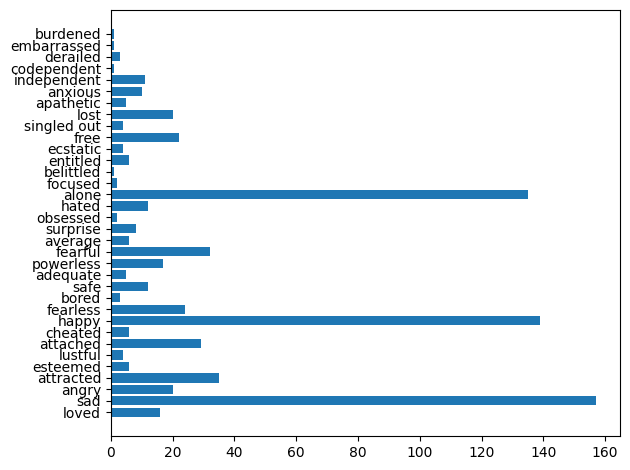

In [71]:
w=Counter(L)
w
plt.barh(w.keys(),w.values())
plt.tight_layout()
plt.show()

In [72]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def sentiment(emotion):
    score = SentimentIntensityAnalyzer().polarity_scores(emotion)
    return score
senti=[]
value=[]
for row in df['mapped_emotions']:
  total_compound = 0

  for emotion in row:
    score=sentiment(emotion)
    total_compound += score['compound']
  value.append(total_compound)

  if total_compound < -0.05:
    senti.append("Negative")

  elif total_compound >=0.05:
    senti.append("Positive")
  else:
    senti.append("Neutral")


df['sentiment']=senti
df['sentiment_score']=value

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [73]:
df.sample(20)

,poem_name,poem_content,poet_name,category,poem_content,poem_content_cleaned,poem_tokens,poem_stemmed,poem_content_final,mapped_emotions,sentiment,sentiment_score
151,The Unfading Beauty,HE that loves a rosy cheek||Or a coral lip adm...,Carew Thomas,beauty,HE that loves a rosy cheek Or a coral lip adm...,loves rosy cheek coral lip admires starlike ey...,"[loves, rosy, cheek, coral, lip, admires, star...","[love, rosi, cheek, coral, lip, admir, starlik...","[love, rosi, cheek, coral, lip, admir, starlik...","[attracted, apathetic, lustful, singled out, e...",Negative,-0.9259
222,Of Man By Nature,From God he's a backslider||Of ways he loves t...,Bunyan John,nature,From God he's a backslider Of ways he loves t...,god hes backslider ways loves wider wickedness...,"[god, hes, backslider, ways, loves, wider, wic...","[god, hes, backslid, way, love, wider, wicked,...","[god, hes, backslide, way, love, wider, wicked...","[attracted, apathetic, lustful, singled out, e...",Negative,-0.7582
196,American Beauty,The perfect American Beauty Rose||is it dimini...,McKee Louis,beauty,The perfect American Beauty Rose is it dimini...,perfect american beauty rose diminished slag h...,"[perfect, american, beauty, rose, diminished, ...","[perfect, american, beauti, rose, diminish, sl...","[perfect, american, beauti, rise, diminish, sl...","[attracted, apathetic, lustful, singled out, e...",Negative,-0.7788
113,Hymn To Intellectual Beauty,The awful shadow of some unseen Power|Floats t...,Shelley Bysshe,beauty,The awful shadow of some unseen Power Floats t...,awful shadow unseen power floats unseen among ...,"[awful, shadow, unseen, power, floats, unseen,...","[aw, shadow, unseen, power, float, unseen, amo...","[aw, shadow, unseen, power, float, unseen, amo...","[attracted, apathetic, esteemed, sad, surprise...",Negative,-0.6527
367,Believe,With the power of my thoughts I summoned you;|...,Rakha Marwa,believe,With the power of my thoughts I summoned you; ...,power thoughts summoned blink made vanish dark...,"[power, thoughts, summoned, blink, made, vanis...","[power, thought, summon, blink, made, vanish, ...","[power, think, summon, blink, make, vanish, da...","[attracted, apathetic, lustful, singled out, e...",Negative,-1.1601
164,Beauty,Even as on some black background full of night...,Blind Mathilde,beauty,Even as on some black background full of night...,even black background full night hollow storm ...,"[even, black, background, full, night, hollow,...","[even, black, background, full, night, hollow,...","[even, black, background, full, night, hollow,...","[attracted, apathetic, lustful, singled out, e...",Negative,-0.8306
223,Nature| The Gentlest Mother|,Nature| the gentlest mother||Impatient of no c...,Dickinson Emily,nature,Nature the gentlest mother Impatient of no c...,nature gentlest mother impatient child feebles...,"[nature, gentlest, mother, impatient, child, f...","[natur, gentlest, mother, impati, child, feebl...","[natur, gentlest, mother, impati, child, feebl...","[attracted, apathetic, lustful, singled out, e...",Negative,-0.7582
179,Sonnet,Snowdrop of dogs| with ear of brownest dye||Li...,Beddoes Lovell,beauty,Snowdrop of dogs with ear of brownest dye Li...,snowdrop dogs ear brownest dye like last orpha...,"[snowdrop, dogs, ear, brownest, dye, like, las...","[snowdrop, dog, ear, brownest, dye, like, last...","[snowdrop, dog, ear, brownest, dye, like, last...","[attracted, apathetic, lustful, singled out, e...",Negative,-0.8306
273,Nature Defends,Disasters aplenty| run-rampant today|Why? You ...,Lucero Ray,nature,Disasters aplenty run-rampant today Why? You ...,disasters aplenty runrampant today may ask loo...,"[disasters, aplenty, runrampant, today, may, a...","[disast, aplenti, runramp, today, may, ask, lo...","[disast, aplenti, runramp, today, may, ask, lo...","[attracted, apathetic, lustful, singled out, e...",Negative,-1.1601
267,Nature,Nature is beautiful|Nature is enticing|Nature ...,Lakhanigam Srinidhi,nature,Nature is beau

In [74]:
values=df['sentiment'].value_counts()#i have no clue why

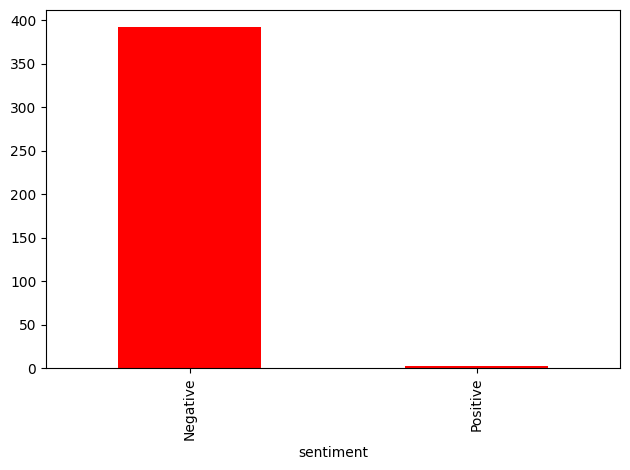

In [75]:
values.plot(kind='bar', color='red')
plt.tight_layout()
plt.show()

In [78]:
scoresgroup=df.groupby('poet_name ')['sentiment_score'].mean()#avg sentiment score

In [79]:
poet=[]
for row in df['poet_name ']:
   poet=df['poet_name '].unique().tolist()
for row in df['mapped_emotions']:
  for emo in row:
    c.update(emo)

In [80]:
#saddest
print(scoresgroup.min())
print(scoresgroup.idxmin())

-1.4900000000000007
Dempsey Dónall


In [81]:
#happiest
print(scoresgroup.max())
print(scoresgroup.idxmax())

0.07189999999999996
foulk jim


In [82]:
df['length']=df['poem_content'].apply(len)
df

,poem_name,poem_content,poet_name,category,poem_content,poem_content_cleaned,poem_tokens,poem_stemmed,poem_content_final,mapped_emotions,sentiment,sentiment_score,length
0,I Wandered Lonely As A Cloud (Daffodils),I wandered lonely as a cloud|That floats on hi...,Wordsworth William,lonely,I wandered lonely as a cloud That floats on hi...,wandered lonely cloud floats high oer vales hi...,"[wandered, lonely, cloud, floats, high, oer, v...","[wander, lone, cloud, float, high, oer, vale, ...","[wander, lone, cloud, float, high, oer, vale, ...","[alone, happy, anxious]",Positive,0.0719,811
1,Lonely Am I,Lonely are the nights|Lonely are the days|Lone...,foulk jim,lonely,Lonely are the nights Lonely are the days Lone...,lonely nights lonely days lonely many ways lon...,"[lonely, nights, lonely, days, lonely, many, w...","[lone, night, lone, day, lone, mani, way, lone...","[lone, night, lone, day, lone, mani, way, lone...","[alone, happy, anxious]",Positive,0.0719,319
2,A Thought For A Lonely Death,IF God compel thee to this destiny||To die alo...,Browning Barrett,lonely,IF God compel thee to this destiny To die alo...,god compel thee destiny die alone none beside ...,"[god, compel, thee, destiny, die, alone, none,...","[god, compel, thee, destini, die, alon, none, ...","[god, compel, thee, destini, die, alon, none, ...","[alone, hated, happy, anxious]",Negative,-0.5650,587
3,Lonely Is Just One Word,Lonely is just one word chosen to represent so...,Havran Mary,lonely,Lonely is just one word chosen to represent so...,lonely one word chosen represent much tell fee...,"[lonely, one, word, chosen, represent, much, t...","[lone, one, word, chosen, repres, much, tell, ...","[lone, one, word, choose, repres, much, tell, ...","[sad, hated, alone, happy, anxious]",Negative,-1.0417,585
4,The Lonely Soul,The lonely soul wanders|Alone in the walks of ...,thermadam anto,lonely,The lonely soul wanders Alone in the walks of ...,lonely soul wanders alone walks life soul comp...,"[lonely, soul, wanders, alone, walks, life, so...","[lone, soul, wander, alon, walk, life, soul, c...","[lone, soul, wander, alon, walk, life, soul, c...","[sad, hated, alone, happy, anxious]",Negative,-1.0417,543
...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,I Believe I Am N I Believe I Can,I believe i am wise enuff 2 amke my own choice...,Kelly Shakima,believe,I believe i am wise enuff 2 amke my own choice...,believe wise enuff 2 amke choices believe spea...,"[believe, wise, enuff, 2, amke, choices, belie...","[believ, wise, enuff, 2, amk, choic, believ, s...","[believ, wise, enuff, 2, amk, choic, believ, s...","[attracted, apathetic, lustful, singled out, e...",Negative,-1.1601,484
390,Why Dont You Believe Me When I Say Youre Ama...,Why dont you believe me when I say youre ama...,Brown Dan,believe,Why dont you believe me when I say youre ama...,dont believe say youre amazing say handsome fa...,"[dont, believe, say, youre, amazing, say, hand...","[dont, believ, say, your, amaz, say, handsom, ...","[dont, believ, say, your, amaz, say, handsom, ...","[attracted, apathetic, lustful, singled out, e...",Negative,-1.1601,1098
391,Believe In Yourself,When you look for recognition|do you seek appr...,Moore Ann,believe,When you look for recognition do you seek appr...,look recognition seek approval praise keeps go...,"[look, recognition, seek, approval, praise, ke...","[look, recognit, seek, approv, prais, keep, go...","[look, recognit, seek, approv, prais, keep, go...","[attracted, apathetic, lustful, singled out, e...",Negative,-1.1601,305
392,I Believe In,I believe in having good friends|They keep you...,Chidi Sylvia,believe,I believe in having good friends They keep you...,believe good friends keep date latest fashion ...,"[believe, good, friends, keep, date, latest, f...","[believ, good, friend, keep, date, latest, fas...","[believ, good, friend, keep, date, latest, fas...","[attracted, apathetic, lustful, singled out, e...",Negative,-1.1601,1181


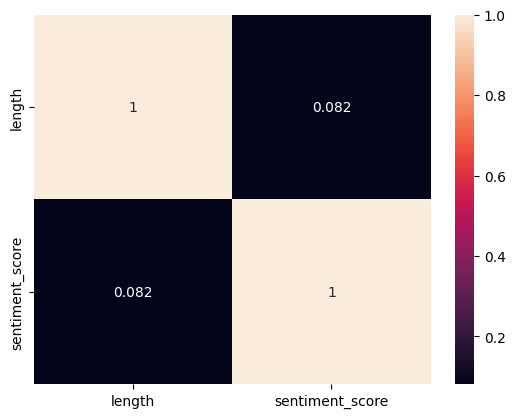

In [83]:
df_corr=df[['length', 'sentiment_score']].dropna().corr()
import seaborn as sns
sns.heatmap(df_corr,annot=True)
plt.show()
#this means that there is very weak or no linear relationship between the length of a poem and its sentiment score.